# K nearest neighbour

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.array([[.8,.8,1], [1,1,1],[1.2,0.8,1], [.8,1.2,1], [1.2,1.2,1], [4,3,2], [3.8,2.8,2], [4.2,2.8,2], [3.8,3.2,2], [4.2,3.2,2], [4.4,2.8,2], [4.4,3.2,2], [3.2,0.4,3], [3.2,0.7,3], [3.8,0.5,3], [3.5,1,3], [4,1,3], [4,7,3]])

In [3]:
#Shuffling the dataset
np.random.shuffle(data)

In [4]:
X = data[:,0:2]
y = data[:,2]

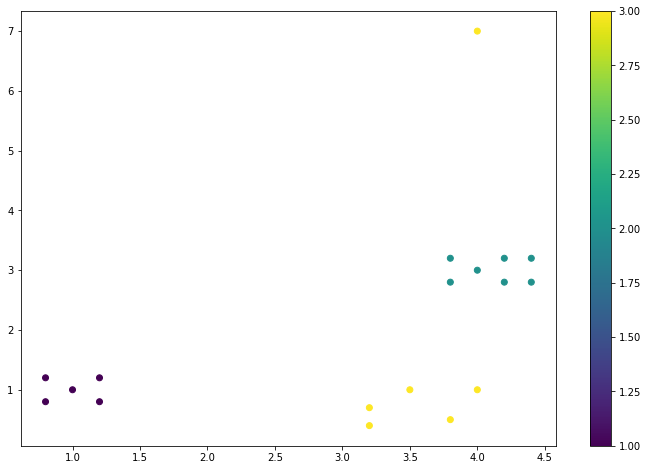

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

# Applying 3-fold cross validation with K values (1,8)

In [6]:
fold = 3
length = len(X)
partition = int(length/fold)
accuracies = np.zeros(7)
for k in range(1,8):
    K = k
    sum_acc = 0
    for i in range(0,length, partition):
        index = np.ones((length), bool)
        index[i:(i+partition)] = False
        X_cv = X[np.logical_not(index), :]
        y_cv = y[np.logical_not(index)]
        X_train = X[index]
        y_train = y[index]
        sum = 0

        for j in range(0, partition):
            example = X_cv[j,:]
            distance = np.sum(np.square(X_train - example), axis = 1)

            sorted_class = y_train[distance.argsort()]
            sorted_dist = np.sort(distance)

            votes = np.unique(sorted_class[:K], return_counts=True)
            temp = np.array(votes[1])
            max_count_index = temp.argmax()
            belong = votes[0][max_count_index]

            if(belong == y_cv[j]):
                sum = sum + 1

        sum_acc = sum_acc + sum/(partition)
    result = sum_acc/(length/partition)
    print("Accuracy for  k =",K,"is",result)
    accuracies[k-1] = result  

Accuracy for  k = 1 is 0.9444444444444445
Accuracy for  k = 2 is 0.9444444444444445
Accuracy for  k = 3 is 0.9444444444444445
Accuracy for  k = 4 is 0.8333333333333334
Accuracy for  k = 5 is 0.7777777777777778
Accuracy for  k = 6 is 0.7777777777777778
Accuracy for  k = 7 is 0.5555555555555555


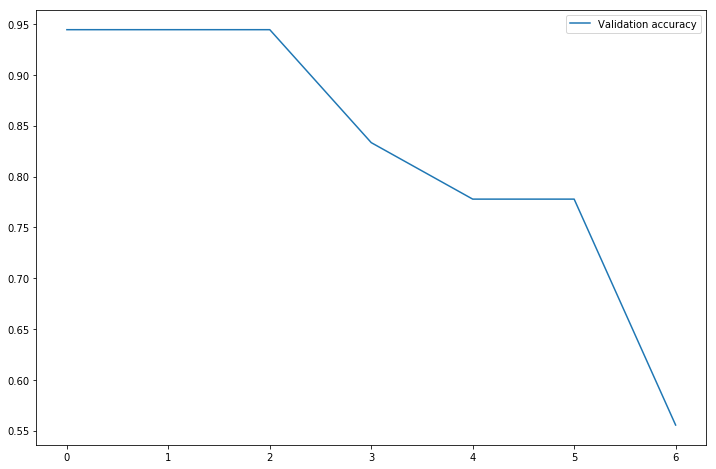

In [14]:
plt.figure(figsize=(12,8))
plt.plot(accuracies)
plt.legend(['Validation accuracy'])

# Lets solve with an Example taking best K value

In [8]:
best_k = accuracies.argmax() + 1
example = np.array([[4,4.2]])

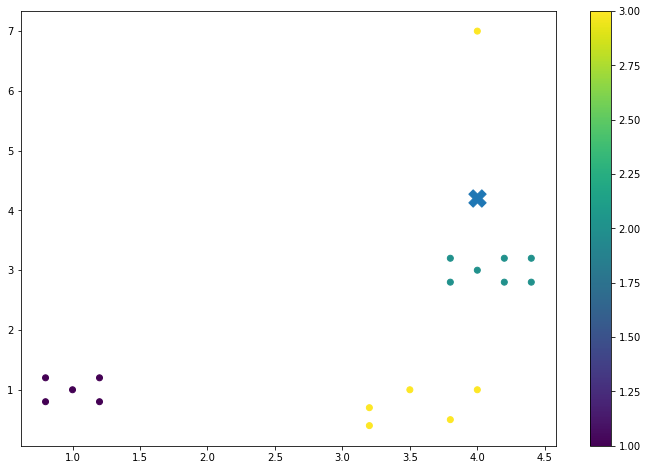

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()
plt.scatter(example[0,0], example[0,1], marker='X', s=300)

In [10]:
distance = np.sum(np.square(X - example), axis = 1)
K = best_k
sorted_class = y[distance.argsort()]
sorted_dist = np.sort(distance)
votes = np.unique(sorted_class[:K], return_counts=True)
temp = np.array(votes[1])
max_count_index = temp.argmax()
belong = votes[0][max_count_index]
print("The Example belongs to class :",belong, ",Considering K as", K)

The Example belongs to class : 2.0 ,Considering K as 1
